## EPi phase correction using three navigators
###### Author: Zimu Huo
###### Date: 07.2022


Simple and elegant technique 

-------------------------------------------------------------------------
References

    [1] 
    Author:  O. Heid
    Title: Robust EPI Phase Correction
    Link: https://www.researchgate.net/publication/308960869_Robust_EPI_Phase_Correction

In [1]:
import twixtools
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, '../../')
sys.path.insert(1, '../')
from util.twix import *
from util.fft import *
from util.epi import *
import util.simulator as simulate

In [2]:
import pickle
with open("../lib/SSEPI_data", "rb") as fp:   # Unpickling
    file = pickle.load(fp)
FIGSIZE = (10,6)
epiorder = 9

In [3]:
pha = file[0]['readouts']
phaflag=file[0]['flags']
data = file[1]['readouts']
dataflag = file[1]['flags']
print(data.shape)

(48, 128, 30)


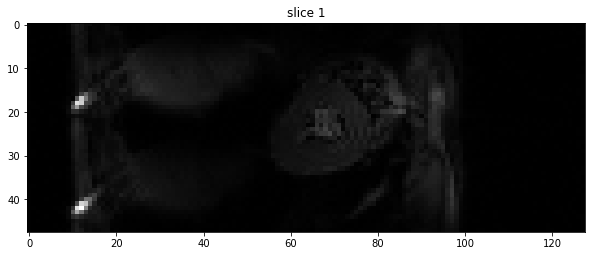

In [4]:
plt.figure(figsize = FIGSIZE)
plt.title("slice 1")
plt.imshow(np.abs(rsos(ifft2c(data))), cmap ="gray")

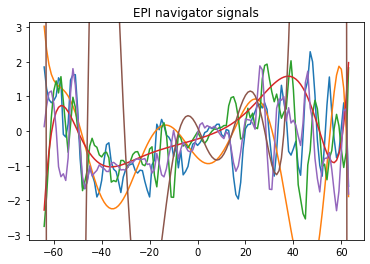

In [5]:
recon = epi_phasecorrection_percoil(data, pha, dataflag, phaflag, order = epiorder, v = 1)

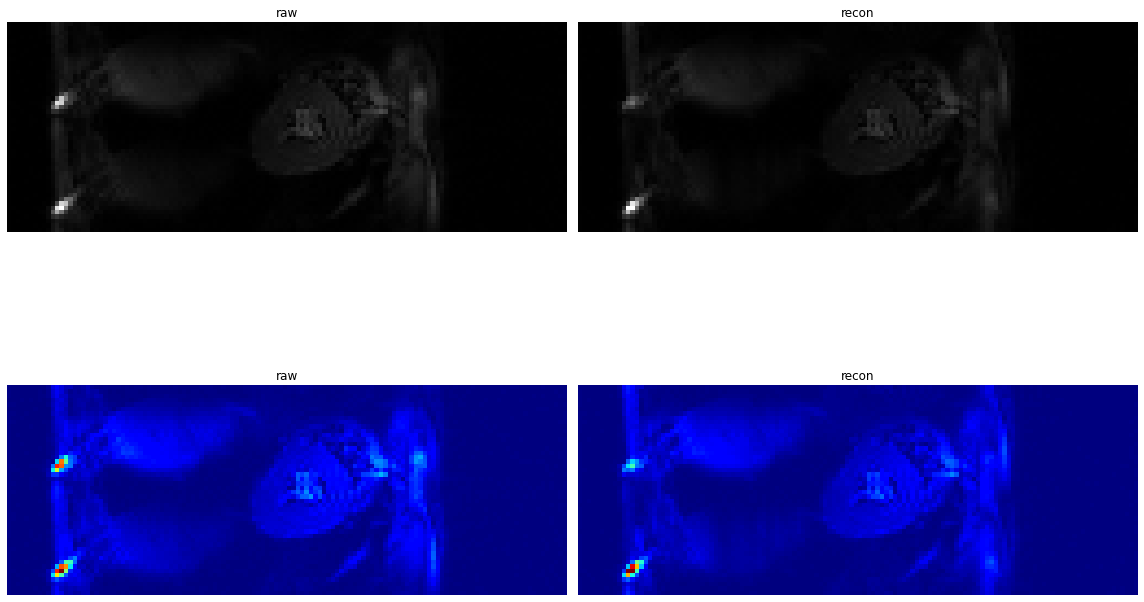

In [7]:
plt.figure(figsize =(16,12))
plt.subplot(221)
plt.title("raw")
plt.axis('off')
plt.imshow(np.abs(rsos(ifft2c(data))), cmap ="gray")
plt.subplot(222)
plt.axis('off')
plt.title("recon")
plt.imshow(np.abs(rsos(ifft2c(recon))), cmap ="gray")
plt.subplot(223)
plt.axis('off')
plt.title("raw")
plt.imshow(np.abs(rsos(ifft2c(data))), cmap ="jet")
plt.subplot(224)
plt.axis('off')
plt.title("recon")
plt.imshow(np.abs(rsos(ifft2c(recon))), cmap ="jet")
plt.tight_layout()
plt.savefig("EPI_per_coil.png")